In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# You should drop any duplicates values
# You should drop any null values
# You should drop PassengerId, Name, SibSp, Ticket, Cabin, Embarked, Sex columns

df = pd.read_csv('titanic.csv')
columns_to_drop = ["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Sex"]
df = df.drop(columns=columns_to_drop)
df = df.drop_duplicates()
df = df.dropna(how='any')
df


,Survived,Pclass,Age,Parch,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
883,0,2,28.0,0,10.5000
885,0,3,39.0,5,29.1250
887,1,1,19.0,0,30.0000
889,1,1,26.0,0,30.0000


In [26]:

# You will now build a simple Logistic Regression model using the sklearn library
# You should use the following columns as your features Pclass, Age, Parch, Fare for your X values
# The Y value should be the survived column

X_train, X_test, y_train, y_test  = train_test_split(df.drop("Survived", axis=1), df["Survived"])
model = LogisticRegression().fit(X=X_train, y=y_train)

# Check the score of your model for the train values
model.score(X=X_train, y=y_train)


0.7200811359026369

In [27]:

# Check the score of your model for the test values
model.score(X=X_test, y=y_test)


0.6484848484848484

In [34]:

# Produce a classification report for your y values
classification_report(y_test, model.predict(X_test), output_dict=True, target_names=["Died", "Survived"])


{'Died': {'precision': 0.6893203883495146,
  'recall': 0.7319587628865979,
  'f1-score': 0.7100000000000001,
  'support': 97.0},
 'Survived': {'precision': 0.5806451612903226,
  'recall': 0.5294117647058824,
  'f1-score': 0.5538461538461539,
  'support': 68.0},
 'accuracy': 0.6484848484848484,
 'macro avg': {'precision': 0.6349827748199186,
  'recall': 0.6306852637962401,
  'f1-score': 0.631923076923077,
  'support': 165.0},
 'weighted avg': {'precision': 0.6445330220463324,
  'recall': 0.6484848484848484,
  'f1-score': 0.6456456876456877,
  'support': 165.0}}

In [33]:

# Produce a confusion matrix for your model
cm = confusion_matrix(y_test, model.predict(X_test))
{"TN": cm[0][0], "FP": cm[0][1], "FN": cm[1][0], "TP": cm[1][1]}


{'TN': 71, 'FP': 26, 'FN': 32, 'TP': 36}

In [45]:

# Plot a ROC curve for your model
y_scores = model.predict_proba(X_test)
y_scores = [x[1] for x in model.predict_proba(X_test)]  # just grab the probability scores
# model.predict_proba(X_test)
# y_scores

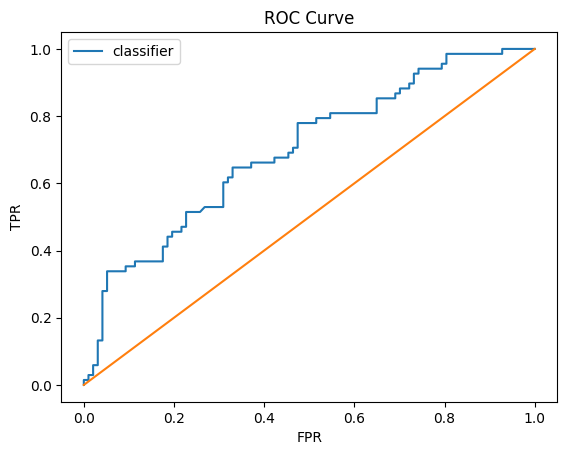

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr)
plt.legend(["classifier")
plt.plot([0, 1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()